# Lab 1 : 산점도 - 변수 간 관계 표현하기
- 나이와 따른 소득 처럼 연속된 값으로 된 두 변수의 관계를 표현할 때 사용

<AxesSubplot:xlabel='displ', ylabel='hwy'>

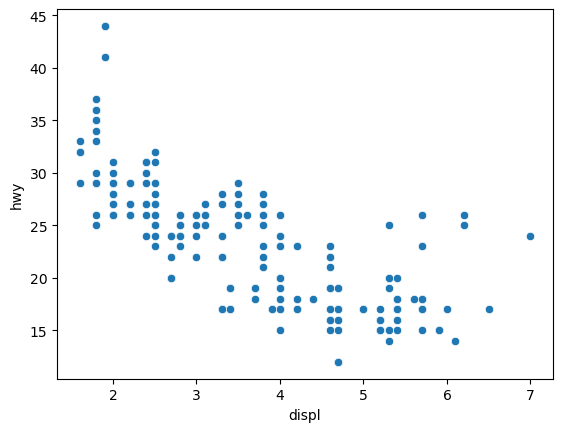

In [5]:
import pandas as pd
import seaborn as sns

mpg = pd.read_csv('data/mpg.csv')

# 배기량(disp)에 따른 고속도로 연비(hwy)의 관계 표시
# 배기량(disp) 변수를 x축에, 고속도로 연비(hwy) 변수를 y축에 놓고 산점도 생성
sns.scatterplot(data=mpg, x='displ', y='hwy')

[(3.0, 6.0)]

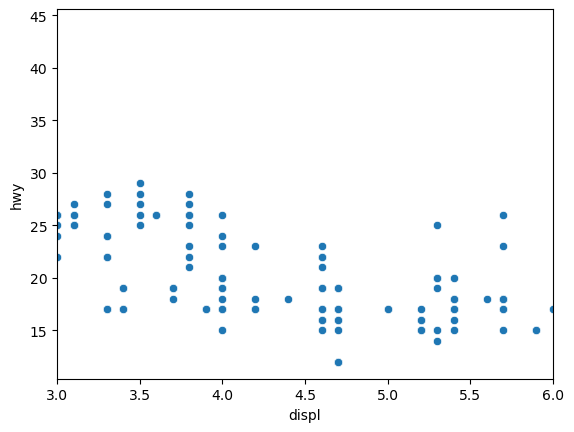

In [6]:
# x 축 범위 설정
# x 축의 범위를 3 ~ 6으로 제한
sns.scatterplot(data=mpg, x='displ', y='hwy').set(xlim = (3, 6))

[(3.0, 6.0), (10.0, 30.0)]

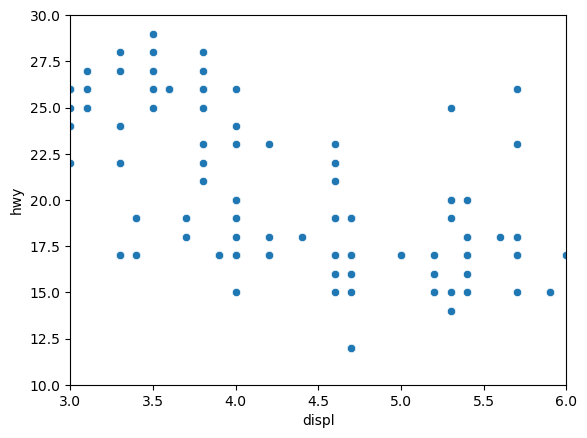

In [7]:
# x 축의 범위를 3 ~ 6으로 제한
# y 축의 범위를 10 ~ 30으로 제한
sns.scatterplot(data=mpg, x='displ', y='hwy').set(xlim = (3, 6), ylim = (10, 30))

<AxesSubplot:xlabel='displ', ylabel='hwy'>

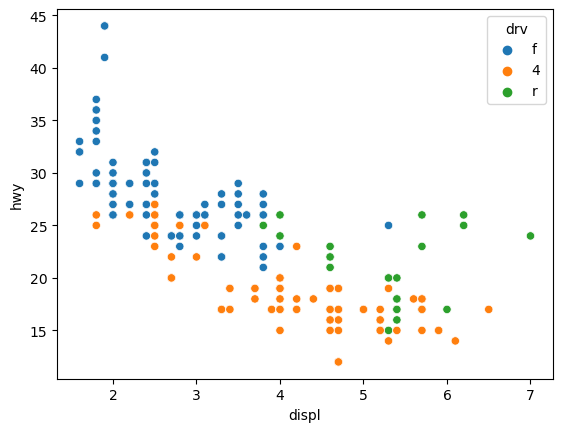

In [8]:
# hue를 이용하면 marker의 색깔을 종류별로 다르게 표현 가능
# 배기량(disp)에 따라 고속도로 연비(hwy)의 관계 표시
# 구동방식(div)에 따라 marker의 색깔을 다르게 표시
sns.scatterplot(data=mpg, x='displ', y='hwy', hue='drv')

- 고속도로 연비 비교 ?
 1. 배기량이 큰 차는 고속도로 연비가 낮다.
- 고속도로 연비 비교 ?
 1. 전륜구동(f) 자동차는 고속 도로 연비가 높다.
 2. 후륜구종(r) 자동차는 고속 도로 연비가 낮다.
- 고속도로 연비 비교 ?
 1. 전륜구동(f) 자동차이기 때문에 고속 도로 연비가 높다.
 2. 후륜구종(r) 자동차이기 때문에 고속 도로 연비가 낮다.
- 고속도로 연비 비교 ?
 1. 전륜구동(f) 자동차는 대부분 배기량이 4이하이고, 고속 도로 연비가 높다.
 2. 후륜구종(r) 자동차는 대부분 배기량이 4이상이고, 고속 도로 연비가 낮다.


# Lab 2 : mpg와 midwest 데이터를 이용하여 데이터 분석

<AxesSubplot:xlabel='cty', ylabel='hwy'>

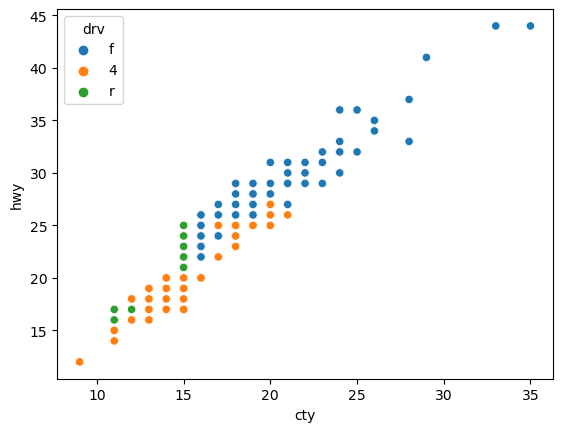

In [11]:
# 1. mpg 데이터에서 도시연비(cty)와 고속도로 연비(hwy)사이 관계 알아보기
sns.scatterplot(data=mpg, x='cty', y='hwy', hue='drv')

[(0.0, 500000.0), (0.0, 10000.0)]

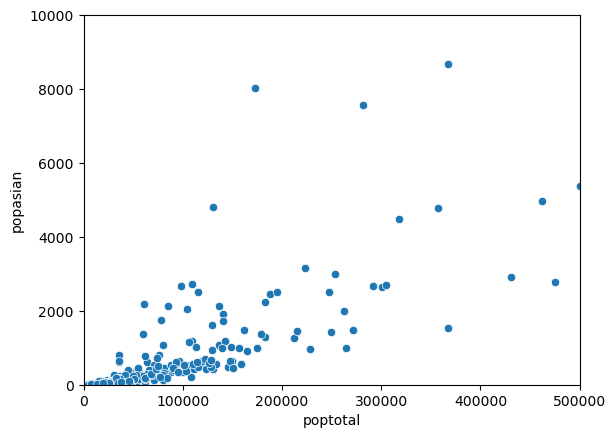

In [13]:
# 2. 미국 지역별 인구 정보 데이터 midwest.csv를 이용하여 분석한다
# x축은 지역별 전체인구(poptotal), y축은 아시아계 인구(popasian)
# 전체 인구는 50만명 이하, 아시아 인구는 1만명 이하 지역만 산점도에 표시함
midwest = pd.read_csv('data/midwest.csv')
sns.scatterplot(data=midwest, x='poptotal', y='popasian').set(xlim = (0, 500000), ylim = (0, 10000))

# Lab 3 : 평균 막대 그래프 만들기

In [14]:
# 1. 집단별 평균표 만들기
# 구동방식(drv)별 고속도로 연비 평균 비교 그래프 만들기

mpg = pd.read_csv('data/mpg.csv')
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [17]:
# 구동방식(drv)별로 고속도로 연비(hwy) 평균 구하기
# 그룹에 사용하는 컬럼(변수)가 기본적으로 인덱스가 된다.
# 컬럼(변수)을 인덱스로 생성하지 않기 위해서 'as_index=False' 사용
df_mpg = mpg.groupby('drv', as_index=False).agg(mean_hwy = ('hwy', 'mean'))
df_mpg

,drv,mean_hwy
0,4,19.174757
1,f,28.160377
2,r,21.000000


<AxesSubplot:xlabel='drv', ylabel='mean_hwy'>

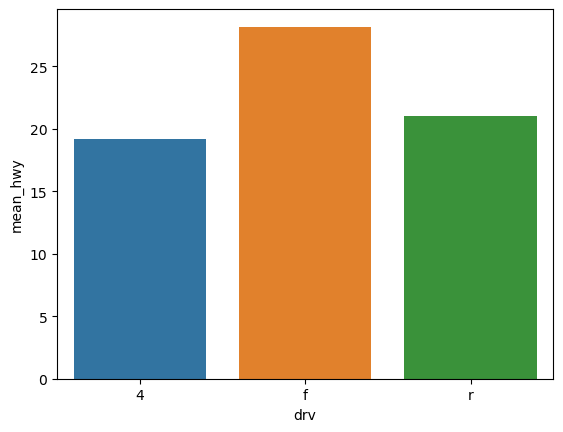

In [18]:
# 구동방식(drv)별 평균 고속도로 연비(mean_hwy)를 막대 그래프로 그리기
sns.barplot(data=df_mpg, x='drv', y='mean_hwy')

In [19]:
# 평균 연비 크기 순으로 내림차순 정렬
df_mpg = df_mpg.sort_values('mean_hwy', ascending=False)
df_mpg

,drv,mean_hwy
1,f,28.160377
2,r,21.000000
0,4,19.174757


<AxesSubplot:xlabel='drv', ylabel='mean_hwy'>

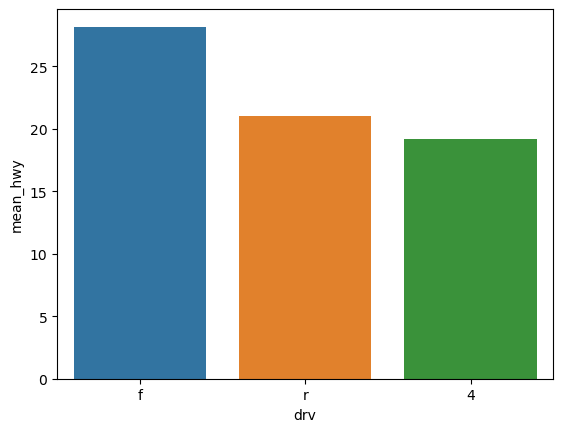

In [21]:
# 구동방식(drv)별 평균 고속도로 연비(mean_hwy)를 막대 그래프로 그리기
sns.barplot(data=df_mpg, x='drv', y='mean_hwy')

# Lab 4 : 빈도 막대 그래프 만들기

In [22]:
# 구동방식(drv)별 빈도표 만들기
df_mpg = mpg.groupby('drv', as_index=False).agg(count_drv = ('drv', 'count'))
df_mpg

,drv,count_drv
0,4,103
1,f,106
2,r,25


<AxesSubplot:xlabel='drv', ylabel='count_drv'>

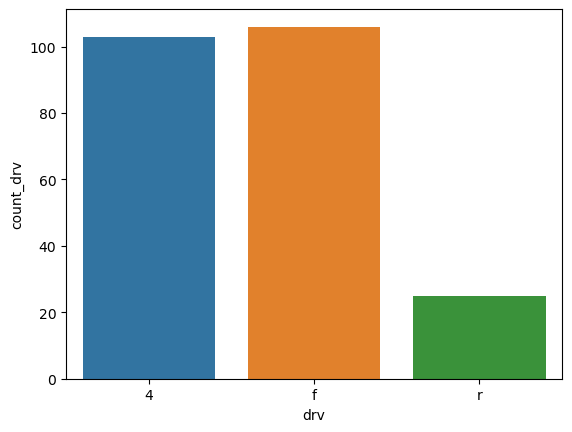

In [23]:
# 구동방식 (drv)별 막대그래프 만들기
sns.barplot(data=df_mpg, x='drv', y='count_drv')

<AxesSubplot:xlabel='drv', ylabel='count'>

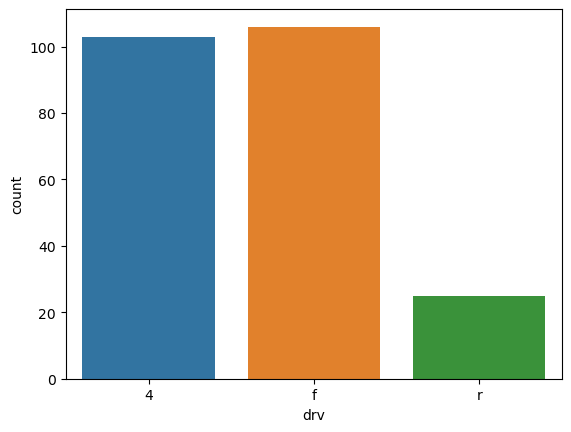

In [32]:
# sns.countplot()으로 구동방식에 따른 빈도 막대 그래프 만들기
# order 로 순서 설정
sns.countplot(data=mpg, x='drv', order = ['4', 'f', 'r'])

<AxesSubplot:xlabel='drv', ylabel='count'>

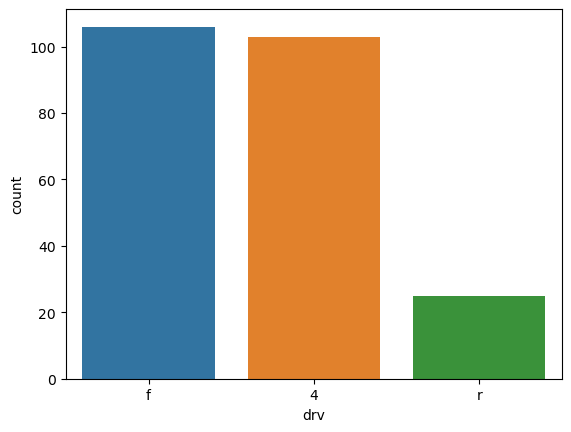

In [36]:
# sns.countplot()으로 구동방식에 따른 빈도 막대 그래프 만들기
# 표시 순서는 빈도 수가 큰 순서
sns.countplot(data=mpg, x='drv', order= mpg['drv'].value_counts().index)

# Lab 5 : mpg 데이터 분석

In [38]:
# 1. 'suv' 차종을 대상으로 cty(도시연비) 평균이 가장 높은 회사 다섯 곳을 막대 그래프로 표현하기
mpg = pd.read_csv('data/mpg.csv')
mpg.head(3)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact


In [51]:
# suv 차량만 추출
# suv를 만드는 회사 별로 도시연비 평균을 구함
# 도시 연비 평균이 높은 회사 순으로 상위 5개 출력
df = mpg.query('category == "suv"').groupby('manufacturer', as_index=False).agg(mean_cty = ('cty', 'mean'))\
                                                                        .sort_values('mean_cty', ascending=False).head(5)
df

,manufacturer,mean_cty
8,subaru,18.833333
9,toyota,14.375000
7,nissan,13.750000
3,jeep,13.500000
6,mercury,13.250000


<AxesSubplot:xlabel='manufacturer', ylabel='mean_cty'>

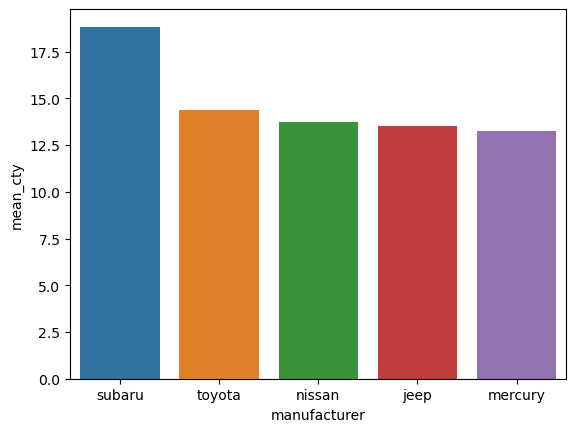

In [48]:
# suv를 만드는 회사별로 도시연비 평균을 구함
# 도시 연비 평균이 높은 회사 순으로 상위 5개 막대 그래프 출력
sns.barplot(data=df, x='manufacturer', y='mean_cty')

In [54]:
# 2. 자동차 중 어떤 category의 차가 많은지 알아보려고 함
## 자동차 category별 자동차 수 테이블 만들고, 내림차순 정렬한 테이블을
## 데이터 프레임 df에 저장
df = mpg.groupby('category', as_index=False).agg(n = ('category', 'count')).sort_values('n', ascending=False)
df

,category,n
6,suv,62
1,compact,47
2,midsize,41
5,subcompact,35
4,pickup,33
3,minivan,11
0,2seater,5


<AxesSubplot:xlabel='category', ylabel='n'>

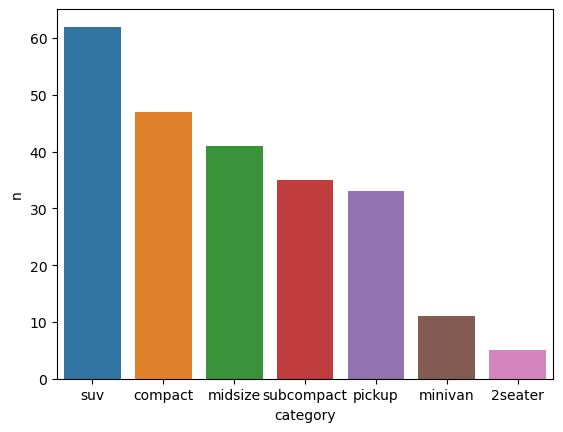

In [55]:
# sns.barplot()을 이용하여 자동차 종류별로 빈도를 표현한 그래프 그리기
sns.barplot(data=df, x= 'category', y= 'n')

# Lab 6 : 시계열 그래프 만들기 - econimics 데이터 분석
- econimics : 미국의 여러 경제 지표를 월별로 나타낸 그래프
- 시간에 따라 실업자 수가 어떻게 변하는지 시계열 그래프를 만들어 보자
- 출처 : bit.ly/easypy_85


In [57]:
# economics 데이터 불러오기
import pandas as pd
economics = pd.read_csv('data/economics.csv')
economics.head()

,date,pce,pop,psavert,uempmed,unemploy
0,1967-07-01,506.7,198712.0,12.6,4.5,2944
1,1967-08-01,509.8,198911.0,12.6,4.7,2945
2,1967-09-01,515.6,199113.0,11.9,4.6,2958
3,1967-10-01,512.2,199311.0,12.9,4.9,3143
4,1967-11-01,517.4,199498.0,12.8,4.7,3066


In [58]:
# economics 데이터의 변수 유형 및 Null 건수 알아보기
economics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574 entries, 0 to 573
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      574 non-null    object 
 1   pce       574 non-null    float64
 2   pop       574 non-null    float64
 3   psavert   574 non-null    float64
 4   uempmed   574 non-null    float64
 5   unemploy  574 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 27.0+ KB


<AxesSubplot:xlabel='date', ylabel='unemploy'>

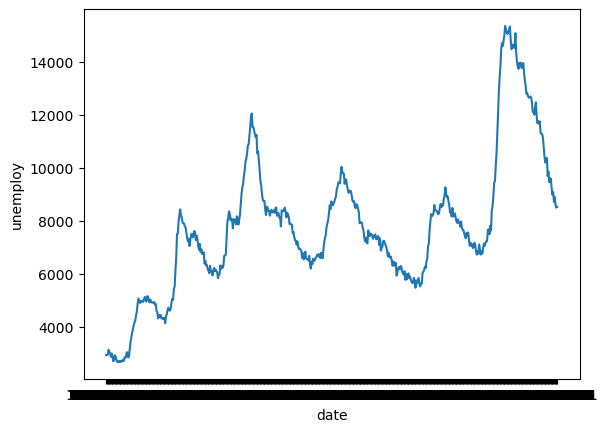

In [60]:
# lineplot()을 이용하여 선 그래프 작성
# x축 date에 여러 날자가 겹쳐 출력됨
import seaborn as sns
sns.lineplot(data = economics, x = 'date', y = 'unemploy')

In [63]:
# 변수 date의 유형을 date 타입으로 변경하여 date2 생성
economics['date2'] = pd.to_datetime(economics['date'])

# economics 데이터의 변수 유형 및 Null 건수 알아보기
# 변수 date, date2 유형 비교
economics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574 entries, 0 to 573
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      574 non-null    object        
 1   pce       574 non-null    float64       
 2   pop       574 non-null    float64       
 3   psavert   574 non-null    float64       
 4   uempmed   574 non-null    float64       
 5   unemploy  574 non-null    int64         
 6   date2     574 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 31.5+ KB


- 날짜 시간 타입 데이타는 df.dt를 이용하여 연, 월, 일을 추출할 수 있음

In [66]:
economics[['date', 'date2']].head()

,date,date2
0,1967-07-01,1967-07-01
1,1967-08-01,1967-08-01
2,1967-09-01,1967-09-01
3,1967-10-01,1967-10-01
4,1967-11-01,1967-11-01


In [72]:
# 연, 월 추출
economics['year'] = economics['date2'].dt.year
economics['month'] = economics['date2'].dt.month

In [71]:
# 일 추출
economics['date2'].dt.day

0      1
1      1
2      1
3      1
4      1
      ..
569    1
570    1
571    1
572    1
573    1
Name: date2, Length: 574, dtype: int64

<AxesSubplot:xlabel='year', ylabel='unemploy'>

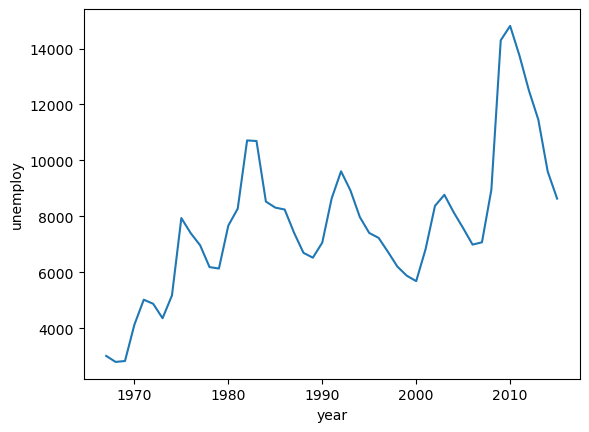

In [84]:
# x축에 연도 표기하기
sns.lineplot(data = economics, x ='year', y='unemploy', ci = None) # ci = None 신뢰구간 표시하지 않기

# Lab7 : economics 데이터 분석 그래프 만들기


In [89]:
# 1. psavert(개인 저축률)가 시간에 따라 어떻게 변해왔는지, 연도별 개인 저축률의 변화 그래프를 만들어 보자
import pandas as pd
import seaborn as sns
economics = pd.read_csv('data/economics.csv')

# econimics 데이터에서 변수 date의 유형을 datetime으로 변경하여 date2로 저장
economics['date2'] = pd.to_datetime(economics['date'])

# economics 데이터 프레임 변수 date2에서 연도를 추출하여 변수 year로 저장
economics['year'] = economics['date2'].dt.year

economics.head(5)

,date,pce,pop,psavert,uempmed,unemploy,date2,year
0,1967-07-01,506.7,198712.0,12.6,4.5,2944,1967-07-01,1967
1,1967-08-01,509.8,198911.0,12.6,4.7,2945,1967-08-01,1967
2,1967-09-01,515.6,199113.0,11.9,4.6,2958,1967-09-01,1967
3,1967-10-01,512.2,199311.0,12.9,4.9,3143,1967-10-01,1967
4,1967-11-01,517.4,199498.0,12.8,4.7,3066,1967-11-01,1967


<AxesSubplot:xlabel='year', ylabel='psavert'>

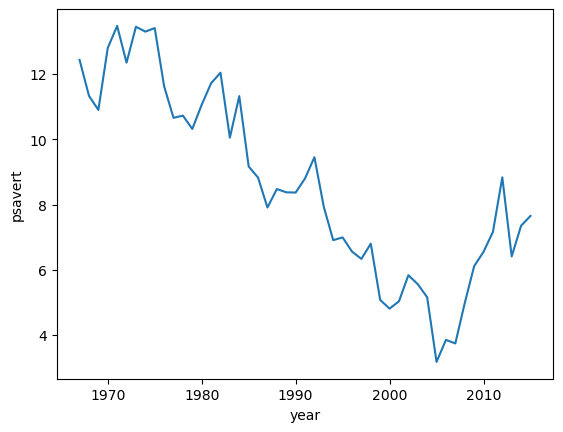

In [92]:
# economics 데이터 프레임에서 연도(year)별 개인저축률(psacert) 선 그래프 그리기
sns.lineplot(data=economics, x='year', y = 'psavert', ci = None)

In [97]:
# 2. 2014년 월별 psavert(개인 저축률)의 변화를 시계열 그래프로 그려보세요.
economics['month'] = economics['date2'].dt.month
df_2014 = economics.query('year == 2014')
df_2014.head()

,date,pce,pop,psavert,uempmed,unemploy,date2,year,month
558,2014-01-01,11512.5,317593.923,7.1,15.4,10202,2014-01-01,2014,1
559,2014-02-01,11566.2,317753.883,7.3,15.9,10349,2014-02-01,2014,2
560,2014-03-01,11643.0,317917.203,7.4,15.8,10380,2014-03-01,2014,3
561,2014-04-01,11702.6,318089.218,7.4,15.7,9702,2014-04-01,2014,4
562,2014-05-01,11748.4,318269.505,7.4,14.6,9859,2014-05-01,2014,5


<AxesSubplot:xlabel='month', ylabel='psavert'>

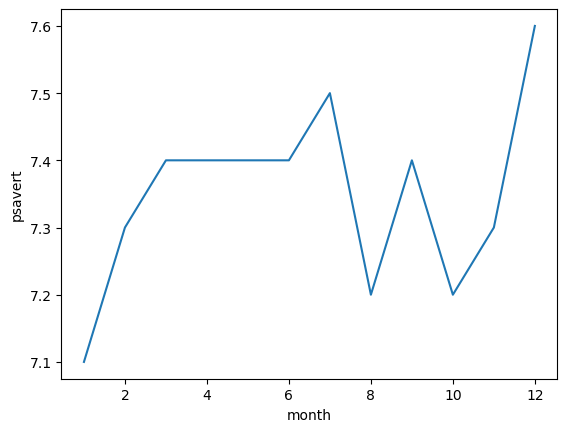

In [99]:
sns.lineplot(data=df_2014, x='month', y='psavert', ci = None)

#  Lab 8 : 상자 그림 만들기
- 상자 그림(Box Plot)은 데이터가 퍼져있는 형태를 직사각형 상자 모양으로 표현한 그래프

<AxesSubplot:xlabel='drv', ylabel='hwy'>

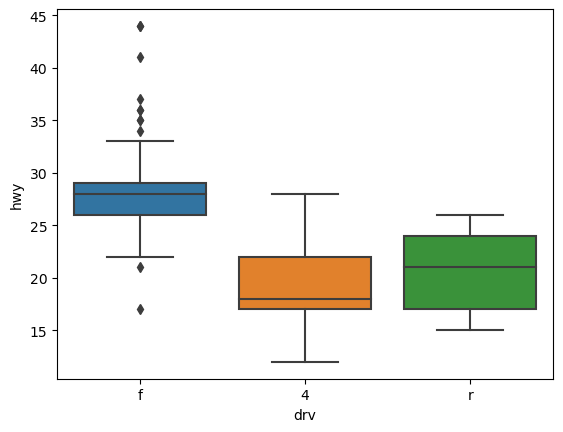

In [101]:
# mpg 데이터를 이용하여 '구동방식(drv)별 고속도로 연비(hwy)'를 표현하기
import pandas as pd
import seaborn as sns
mpg = pd.read_csv('data/mpg.csv')

# x축을 구동방식(drv), y축을 고속도로연비(hwy)로 지정하고,
# 구동방식(drv)별 고속도로 연비(hwy)를 상자그림으로 표현하기
sns.boxplot(data=mpg, x= 'drv', y='hwy')

- 전륜 구동(f)은 연비가 평균적으로 높고, 연비가 극단적으로 높거나 낮은 자동차가 존재함
- 4륜 구종(4)은 연비 평균이 다른 구동방식에 비해 낮음
- 후륜 구동(r)은 극단치가 없고, 자동차 대부분이 사분위 범위에 포함됨

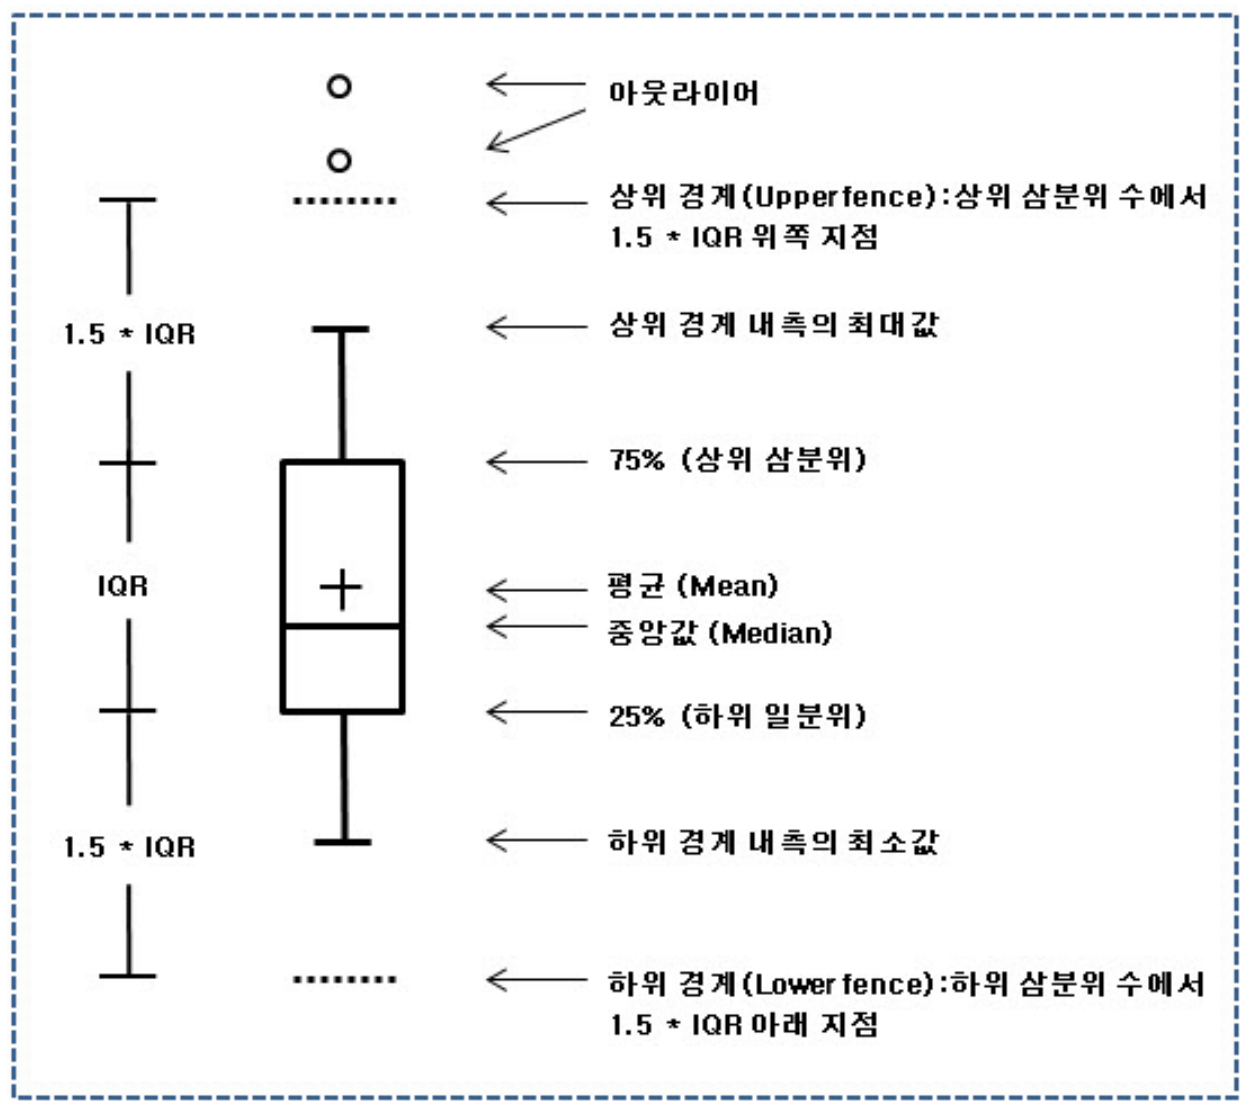

# Lab 8 : mpg 데이터를 분석해 보기
- mpg 데이터를 이용하여 '자동차 종류별 도시 연비'를 비교해 보시오

In [103]:
# 1. 자동차 종류(category)중 'compact', 'subcompact', 'suv' 차종에 대한 도시 연비(cty)를 비교해 보시오
import pandas as pd
import seaborn as sns

mpg = pd.read_csv('data/mpg.csv')

df = mpg.query('category in ["compact", "subcompact", "suv"]')
df.value_counts()

manufacturer  model               displ  year  cyl  trans       drv  cty  hwy  fl  category  
honda         civic               1.6    1999  4    auto(l4)    f    24   32   r   subcompact    2
chevrolet     c1500 suburban 2wd  5.3    2008  8    auto(l4)    r    14   20   r   suv           2
ford          explorer 4wd        4.0    1999  6    auto(l5)    4    14   17   r   suv           2
dodge         durango 4wd         4.7    2008  8    auto(l5)    4    13   17   r   suv           2
subaru        impreza awd         2.5    2008  4    auto(s4)    4    20   27   r   compact       1
                                                                                                ..
ford          mustang             4.6    1999  8    manual(m5)  r    15   22   r   subcompact    1
                                                    auto(l4)    r    15   21   r   subcompact    1
                                  4.0    2008  6    manual(m5)  r    17   26   r   subcompact    1
               

<AxesSubplot:xlabel='category', ylabel='cty'>

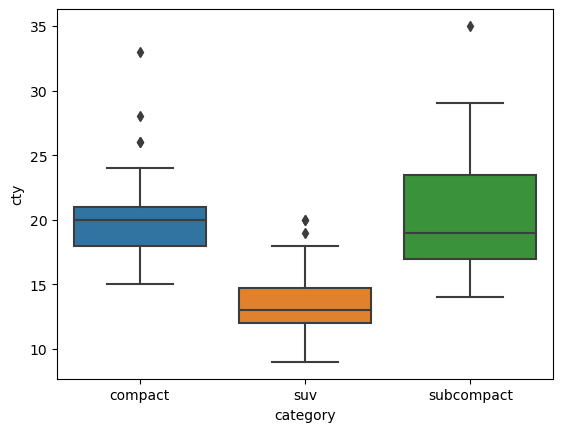

In [104]:
# boxplot 만들기
sns.boxplot(data=df, x='category', y='cty')

- suv의 도시 연비가 가장 낮음